In [99]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [100]:
# Reading data from Dataset
df = pd.read_csv('train2.csv')

In [101]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [102]:
df.rename(columns = {
    'MSSubClass':'IdentityDwellingType',
    'MSZoning':'ZoneType',
    'BldgType':'DwellingType',
    'BsmtQual':'BasementQuality',
    'HeatingQC':'HeatingQualityCondition',
    'GarageQual':'GarageQuality',
}, inplace = True)

In [103]:
df.drop(df.columns.difference([
"IdentityDwellingType",
"DwellingType",
"LotFrontage",
"LotArea",
"Street",
"ZoneType",
"HouseStyle",
"RoofStyle",
"Exterior1st",
"Foundation",
"BasementQuality",
"Heating",
"HeatingQualityCondition",
"Electrical",
"Bedroom",
"KitchenQual",
"GarageQuality",
"GarageArea",
"SalePrice"
]), 1, inplace=True)

/var/folders/lt/x749qs4j6wvcvnsl38kfg1280000gn/T/ipykernel_52736/621223307.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference([


In [104]:
# because some columns contains non numerical data and KMeans accepts only numerical data
# so we are going to take those ntext data and represent them with numerical data
# the below lines of codes in comments conains three columns the first contains the text that are in dataframe
# second column has the explanations of that representation in dataframe 
# third column has the numerical value to be assigned to that in the dataframe
# we will be using the dataframe[column].replace() functions wich takes text data and numerical data to represents them as arguments

In [105]:
# change zone types into numerical value

    #    A   Agriculture                         10                  
    #    C  Commercial                          20
    #    FV Floating Village Residential        30
    #    I  Industrial                          40
    #    RH Residential High Density            50
    #    RL Residential Low Density             60
    #    RP Residential Low Density Park        60
    #    RM Residential Medium Density          80

In [106]:
df['ZoneType'] = df['ZoneType'].replace(['A','C (all)','FV','I','RH','RL','RP','RM'],[10,20,30,40,50,60,70,80])


In [107]:
# change Type of road access to property
    #    Grvl Gravel    10
    #    Pave   Paved   20


In [108]:
df['Street'] = df['Street'].replace(['Grvl','Pave'],[10,20])

In [109]:
# BldgType: Type of dwelling

#        1Fam Single-family Detached                                                10
#        2FmCon Two-family Conversion; originally built as one-family dwelling      20
#        Duplx Duplex                                                               30
#        TwnhsE Townhouse End Unit                                                  40
#        TwnhsI Townhouse Inside Unit                                               50


In [110]:
df['DwellingType'] = df['DwellingType'].replace(['1Fam','2fmCon','Duplex','TwnhsE','Twnhs'],[10,20,30,40,50])


In [111]:
# HouseStyle: Style of dwelling

#        1Story	One story                                                  10
#        1.5Fin	One and one-half story: 2nd level finished                 20
#        1.5Unf	One and one-half story: 2nd level unfinished               30
#        2Story	Two story                                                  40
#        2.5Fin	Two and one-half story: 2nd level finished                 50
#        2.5Unf	Two and one-half story: 2nd level unfinished               60
#        SFoyer	Split Foyer                                                70
#        SLvl	Split Level                                                80

In [112]:
df['HouseStyle'] = df['HouseStyle'].replace(['1Story','1.5Fin','1.5Unf','2Story','2.5Fin','2.5Unf','SFoyer','SLvl'],[10,20,30,40,50,60,70,80])

In [113]:
# RoofStyle: Type of roof

#        Flat   Flat                    10
#        Gable  Gable                   20
#        Gambrel    Gabrel (Barn)       30
#        Hip    Hip                     40
#        Mansard    Mansard             50
#        Shed   Shed                    60

In [114]:
df['RoofStyle'] = df['RoofStyle'].replace(['Flat','Gable','Gambrel','Hip','Mansard','Shed'],[10,20,30,40,50,60])

In [115]:
# Exterior1st: Exterior covering on house

#        AsbShng    Asbestos Shingles   10
#        AsphShn    Asphalt Shingles    20
#        BrkComm    Brick Common        30
#        BrkFace    Brick Face          40
#        CBlock	Cinder Block            50
#        CemntBd    Cement Board        60
#        HdBoard    Hard Board          70
#        ImStucc    Imitation Stucco    80
#        MetalSd    Metal Siding        90
#        Other  Other                   100
#        Plywood    Plywood             110
#        PreCast   PreCast              120
#        Stone  Stone                   130
#        Stucco Stucco                  140
#        VinylSd    Vinyl Siding        150
#        Wd Sdng    Wood Siding         160
#        WdShing    Wood Shingles       170

In [116]:
df['Exterior1st'] = df['Exterior1st'].replace(['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard',
'ImStucc','MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing'
],[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170])

In [117]:
# Foundation: Type of foundation

#        BrkTil Brick & Tile       10
#        CBlock Cinder Block       20
#        PConc Poured Contrete     30
#        Slab   Slab               40
#        Stone  Stone              50
#        Wood   Wood               60

In [118]:
df['Foundation'] = df['Foundation'].replace(['BrkTil','CBlock','PConc','Slab','Stone','Wood'],[10,20,30,40,50,60])


In [119]:
# BsmtQual: Evaluates the height of the basement

#        Ex Excellent (100+ inches)     10
#        Gd Good (90-99 inches)         20
#        TA Typical (80-89 inches)      30
#        Fa Fair (70-79 inches)         40
#        Po Poor (<70 inches            50
#        NA No Basement                 60

In [120]:
df['BasementQuality'] = df['BasementQuality'].replace(['Ex','Gd','TA','Fa','Po','NA'],[10,20,30,40,50,60])

In [121]:
# Heating: Type of heating

#        Floor  Floor Furnace                           10
#        GasA   Gas forced warm air furnace             20
#        GasW   Gas hot water or steam heat             30
#        Grav  Gravity furnace                          40
#        OthW   Hot water or steam heat other than gas  50
#        Wall   Wall furnace                            60

In [122]:
df['Heating'] = df['Heating'].replace(['Floor','GasA','GasW','Grav','OthW','Wall'],[10,20,30,40,50,60])

In [123]:
# HeatingQC: Heating quality and condition

#        Ex Excellent           10
#        Gd Good                20
#        TA Average/Typical     30
#        Fa Fair                40
#        Po Poor                50


In [124]:
df['HeatingQualityCondition'] = df['HeatingQualityCondition'].replace(['Ex','Gd','TA','Fa','Po'],[10,20,30,40,50])

In [125]:
# Electrical: Electrical system

#        SBrkr  Standard Circuit Breakers & Romex                       10
#        FuseA  Fuse Box over 60 AMP and all Romex wiring (Average)	    20
#        FuseF  60 AMP Fuse Box and mostly Romex wiring (Fair)          30
#        FuseP  60 AMP Fuse Box and mostly knob & tube wiring (poor)    40
#        Mix    Mixed                                                   50

In [126]:
df['Electrical'] = df['Electrical'].replace(['SBrkr','FuseA','FuseF','FuseP','Mix'],[10,20,30,40,50])


In [127]:
# KitchenQual: Kitchen quality

#        Ex Excellent           10
#        Gd Good                20
#        TA Typical/Average     30
#        Fa Fair                40
#        Po Poor                50

In [128]:
df['KitchenQual'] = df['KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],[10,20,30,40,50])

In [129]:
# GarageQual: Garage quality

#        Ex Excellent           10
#        Gd Good                20
#        TA Typical/Average     30
#        Fa Fair                40
#        Po Poor                50
#        NA No Garage           60

In [130]:
df['GarageQuality'] = df['GarageQuality'].replace(['Ex','Gd','TA','Fa','Po','NA'],[10,20,30,40,50,60])


In [131]:
# beacause some columns contains null value as for example the garage quality column will contain null for house without garage
# so null will be replaced by 0
df["LotFrontage"].fillna(0, inplace = True)
df["BasementQuality"].fillna(0, inplace = True)
df["GarageQuality"].fillna(0, inplace = True)

# after feeling all null value with 0 in mentioned columns there might be some columns with null value without understandable
# explanation so wie will drop that columns

In [132]:
df.dropna(inplace = True)

In [133]:
# calculating number of clusters using Elbow Technique

num_of_potential_clusters = range(1,10) # define the number of potential clusters
kmeans = [KMeans(n_clusters=i) for i in num_of_potential_clusters] # defining all cluster with KMeans
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # claculating score for defined clusters

<AxesSubplot:>

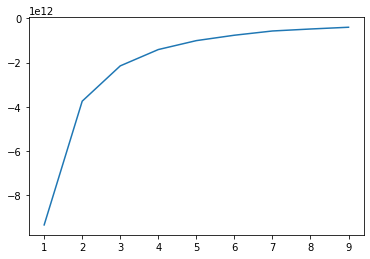

In [134]:
# plot clusters
sns.lineplot(x = num_of_potential_clusters, y = score)

In [135]:
# beacuse the sharp edge are up to cluster number 4 so the rest are all most identical
# so will will consider only 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(df) # the fit the 4 clusters in the KMeans

KMeans(n_clusters=4)

In [136]:
# add clusters column to the data frame to see the cluster every record belongs to
label = df['clusters'] = kmeans.fit_predict(df)

# count all recors per cluster
df['clusters'].value_counts()

3    635
0    524
2    247
1     53
Name: clusters, dtype: int64

In [137]:
df.columns

Index(['IdentityDwellingType', 'ZoneType', 'LotFrontage', 'LotArea', 'Street',
       'DwellingType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Foundation',
       'BasementQuality', 'Heating', 'HeatingQualityCondition', 'Electrical',
       'KitchenQual', 'GarageArea', 'GarageQuality', 'SalePrice', 'clusters'],
      dtype='object')

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

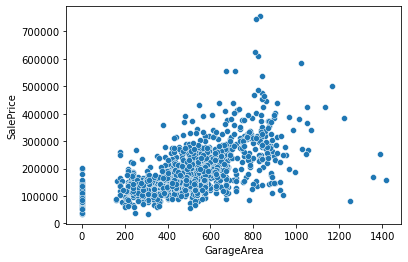

In [138]:
# unclusterred statterplot
sns.scatterplot(data=df,x="GarageArea",y="SalePrice")

In [150]:
## The concentrated data points close to the line of best fit indicate a strong positive relationship between Garage Area and Sale Price. Meaning Sale Price increase with increase in Garage Area.

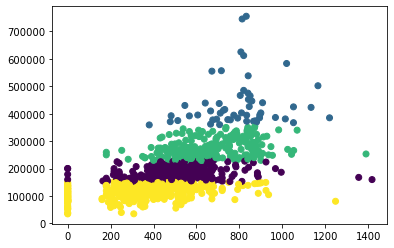

In [139]:
# scatterplot with clusters
plt.scatter(x=df["GarageArea"],y=df["SalePrice"],c=df['clusters'])

In [149]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark Green'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark Blue'
df.loc[df['clusters'] == 1, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'Yellow'

In [146]:
df.groupby('cluster').agg({ 'GarageArea':['mean', 'median'],'SalePrice':['mean', 'median']})

GarageArea             SalePrice          
                 mean median           mean    median
cluster                                              
Red        665.097166  648.0  273443.376518  266000.0
Yellow     496.805344  484.0  184474.759542  180500.0
dark Blue  351.647244  330.0  120574.166929  126000.0
purple     797.169811  813.0  437878.528302  402861.0

In [148]:
# The above table demonstrates a Median for cluster Red which is 648 and is greater than other categories, therefore making it possibly the most attractive for sales. While the best SalePrice is with 266000.0 and is the highest SalesPrice. This will inform future pricing and sale decisions 